In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
!conda install -c conda-forge --yes --prefix {sys.prefix} folium

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.8.3                      py_0    conda-forge


In [3]:
!conda install -c conda-forge --yes --prefix {sys.prefix} wordcloud

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
wordcloud                 1.4.1                    py35_0    conda-forge


In [4]:
import folium
from wordcloud import WordCloud

In [5]:
url ="https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD"
dataframe = pd.read_csv(url, error_bad_lines=False)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print("Number of Rows:", dataframe.shape[0])
print("Number of Columns", dataframe.shape[1])

Number of Rows: 1269498
Number of Columns 18


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269498 entries, 0 to 1269497
Data columns (total 18 columns):
Date received                   1269498 non-null object
Product                         1269498 non-null object
Sub-product                     1034332 non-null object
Issue                           1269498 non-null object
Sub-issue                       740014 non-null object
Consumer complaint narrative    381340 non-null object
Company public response         442640 non-null object
Company                         1269498 non-null object
State                           1250665 non-null object
ZIP code                        1156170 non-null object
Tags                            173869 non-null object
Consumer consent provided?      683400 non-null object
Submitted via                   1269498 non-null object
Date sent to company            1269498 non-null object
Company response to consumer    1269492 non-null object
Timely response?                1269498 non-null obj

In [8]:
print("Number of Missing data in each column:")
dataframe.isna().sum()

Number of Missing data in each column:


Date received                         0
Product                               0
Sub-product                      235166
Issue                                 0
Sub-issue                        529484
Consumer complaint narrative     888158
Company public response          826858
Company                               0
State                             18833
ZIP code                         113328
Tags                            1095629
Consumer consent provided?       586098
Submitted via                         0
Date sent to company                  0
Company response to consumer          6
Timely response?                      0
Consumer disputed?               500997
Complaint ID                          0
dtype: int64

In [9]:
dataframe.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,04/24/2019,Vehicle loan or lease,Lease,Problems at the end of the loan or lease,"Excess mileage, damage, or wear fees, or other...",NaN,NaN,ALLY FINANCIAL INC.,NY,11236,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3221592
1,04/24/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,32208,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3220825
2,04/24/2019,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,NAVY FEDERAL CREDIT UNION,NaN,NaN,NaN,NaN,Referral,04/24/2019,In progress,Yes,NaN,3221769
3,04/24/2019,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,NAVY FEDERAL CREDIT UNION,PA,NaN,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3221849
4,04/24/2019,Student loan,Private student loan,Dealing with your lender or servicer,Don't agree with the fees charged,NaN,Company believes it acted appropriately as aut...,LCS FINANCIAL SERVICES CORPORATION,NY,NaN,NaN,NaN,Web,04/24/2019,Closed with explanation,Yes,NaN,3220811


Let's take a look at the count by states

In [10]:
print("Missing data in states:", dataframe['State'].isna().sum())
print("Percentage of Missing data:", (dataframe['State'].isna().sum() / dataframe.shape[0])*100 )

Missing data in states: 18833
Percentage of Missing data: 1.48349977708


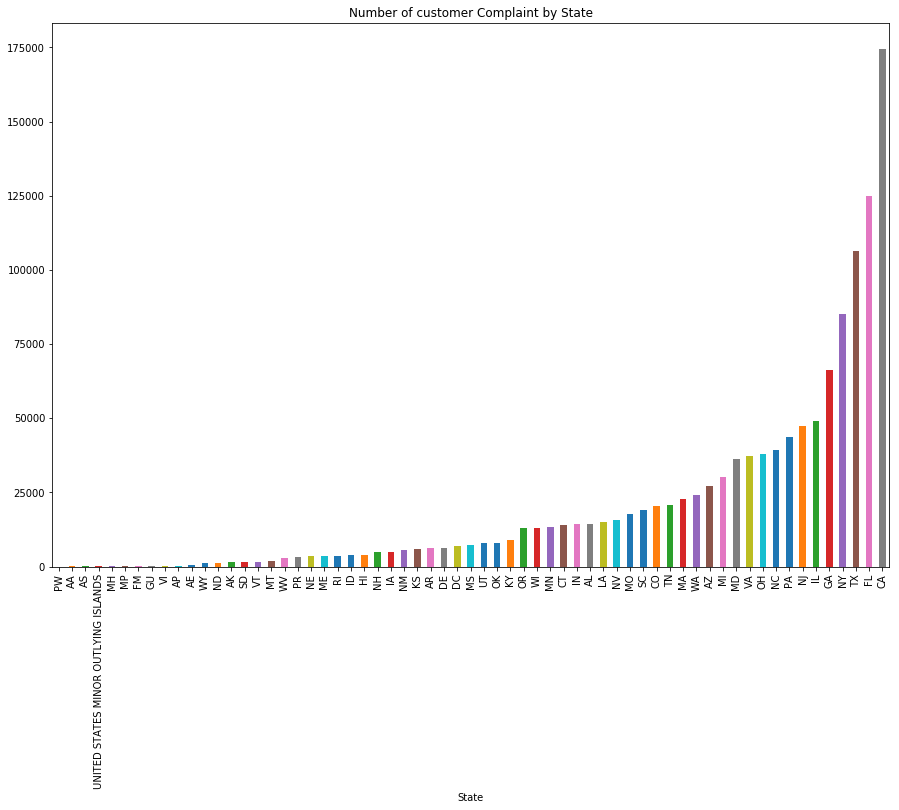

In [11]:
dataframe.groupby('State')['State'].count().sort_values().plot(kind='bar', title="Number of customer Complaint by State", figsize=(15,10))

In [12]:
dataframe.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,04/24/2019,Vehicle loan or lease,Lease,Problems at the end of the loan or lease,"Excess mileage, damage, or wear fees, or other...",NaN,NaN,ALLY FINANCIAL INC.,NY,11236,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3221592
1,04/24/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,32208,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3220825
2,04/24/2019,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,NAVY FEDERAL CREDIT UNION,NaN,NaN,NaN,NaN,Referral,04/24/2019,In progress,Yes,NaN,3221769
3,04/24/2019,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,NAVY FEDERAL CREDIT UNION,PA,NaN,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3221849
4,04/24/2019,Student loan,Private student loan,Dealing with your lender or servicer,Don't agree with the fees charged,NaN,Company believes it acted appropriately as aut...,LCS FINANCIAL SERVICES CORPORATION,NY,NaN,NaN,NaN,Web,04/24/2019,Closed with explanation,Yes,NaN,3220811


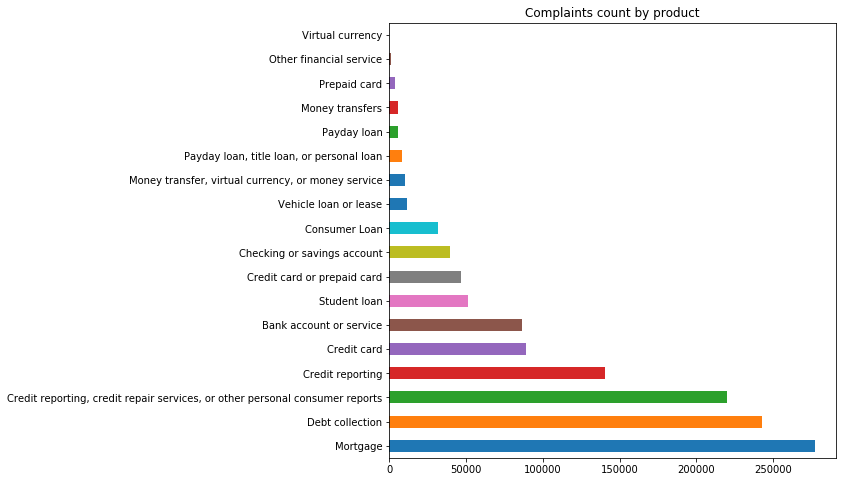

In [13]:
dataframe['Product'].value_counts().sort_values(ascending=False).plot(kind='barh', title="Complaints count by product", figsize=(8,8))

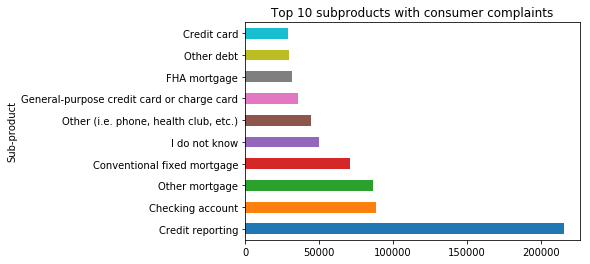

In [14]:
dataframe.groupby('Sub-product')['Sub-product'].count().sort_values(ascending=False)[:10].plot(kind='barh', title="Top 10 subproducts with consumer complaints")

In [15]:
# wordlist = []
# for item in dataframe['Issue']:
#     wordlist.append(item)
# d= (" ").join(wordlist)


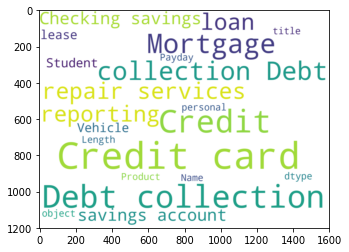

In [16]:
wcloud = WordCloud(width=1600, height=1200, background_color='White').generate(str(dataframe['Product']))
plt.imshow(wcloud, interpolation='bilinear')

In [17]:
dataframe = dataframe.rename(index=str, columns={'Date sent to company':'Date_sent', 'Timely response?':'Timely',
                                     'Consumer disputed?':'consumer_disputed','Consumer consent provided?':'consumer_consent',
                                           'Company response to consumer':'company_response'})

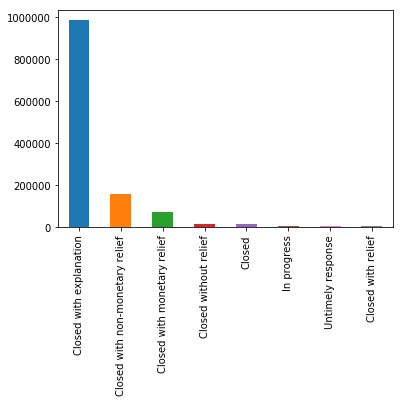

In [18]:
dataframe['company_response'].value_counts().sort_values(ascending=False).plot(kind='bar')

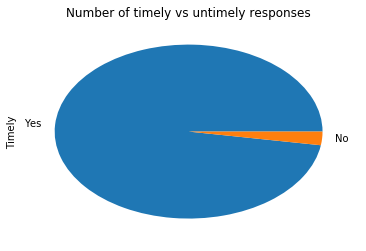

In [19]:
dataframe['Timely'].value_counts().plot(kind='pie', title= "Number of timely vs untimely responses")

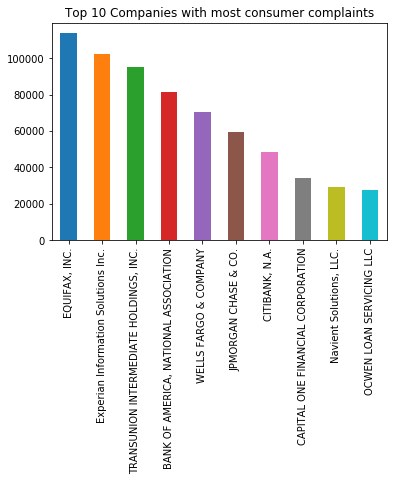

In [20]:
dataframe.Company.value_counts()[:10].plot(kind='bar', title="Top 10 Companies with most consumer complaints")

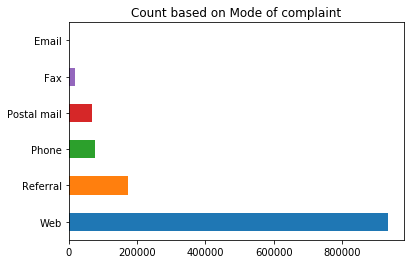

In [21]:
dataframe['Submitted via'].value_counts().plot(kind='barh',title="Count based on Mode of complaint")

In [22]:
dataframe.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,consumer_consent,Submitted via,Date_sent,company_response,Timely,consumer_disputed,Complaint ID
0,04/24/2019,Vehicle loan or lease,Lease,Problems at the end of the loan or lease,"Excess mileage, damage, or wear fees, or other...",NaN,NaN,ALLY FINANCIAL INC.,NY,11236,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3221592
1,04/24/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,32208,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3220825
2,04/24/2019,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,NAVY FEDERAL CREDIT UNION,NaN,NaN,NaN,NaN,Referral,04/24/2019,In progress,Yes,NaN,3221769
3,04/24/2019,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,NAVY FEDERAL CREDIT UNION,PA,NaN,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3221849
4,04/24/2019,Student loan,Private student loan,Dealing with your lender or servicer,Don't agree with the fees charged,NaN,Company believes it acted appropriately as aut...,LCS FINANCIAL SERVICES CORPORATION,NY,NaN,NaN,NaN,Web,04/24/2019,Closed with explanation,Yes,NaN,3220811


In [23]:
dataframe['Date received'] =  pd.to_datetime(dataframe['Date received'])

In [24]:
dataframe['year'] = dataframe['Date received'].dt.year

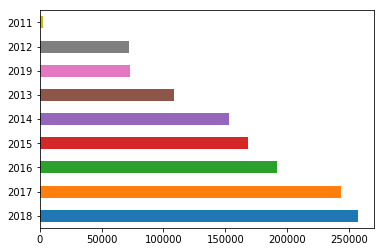

In [25]:
dataframe.year.value_counts().plot(kind='barh')

In [26]:
df = pd.DataFrame(dataframe[dataframe['Product']=='Mortgage'].groupby('year')['year'].count())

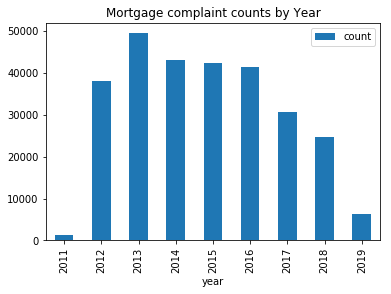

In [27]:
df = df.rename(index=str, columns={'year':'count'})
df.plot(kind='bar', title="Mortgage complaint counts by Year")

As we can see, complains for Mortgage has been decreasing since its huge peak in 2013.

In [28]:
print("Number of missing data for consumer disputes for complaints:",dataframe['consumer_disputed'].isna().sum())

Number of missing data for consumer disputes for complaints: 500997


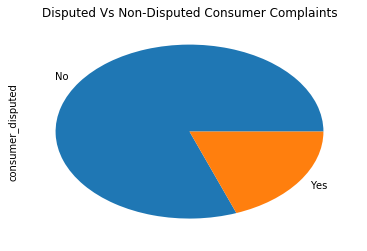

In [29]:
dataframe['consumer_disputed'].value_counts().plot(kind='pie', title="Disputed Vs Non-Disputed Consumer Complaints")

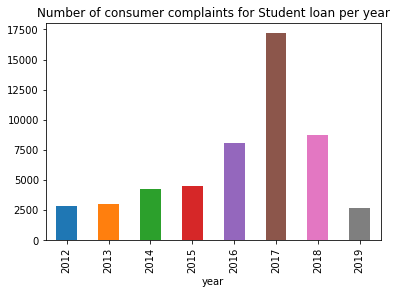

In [30]:
dataframe[dataframe['Product']=='Student loan'].groupby('year')['year'].count().plot(kind='bar', title="Number of consumer complaints for Student loan per year")

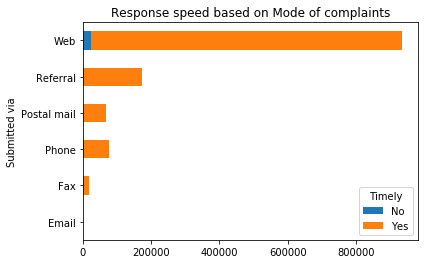

In [31]:
pd.crosstab(dataframe['Submitted via'],dataframe['Timely']).plot(kind='barh',stacked=True, title="Response speed based on Mode of complaints")

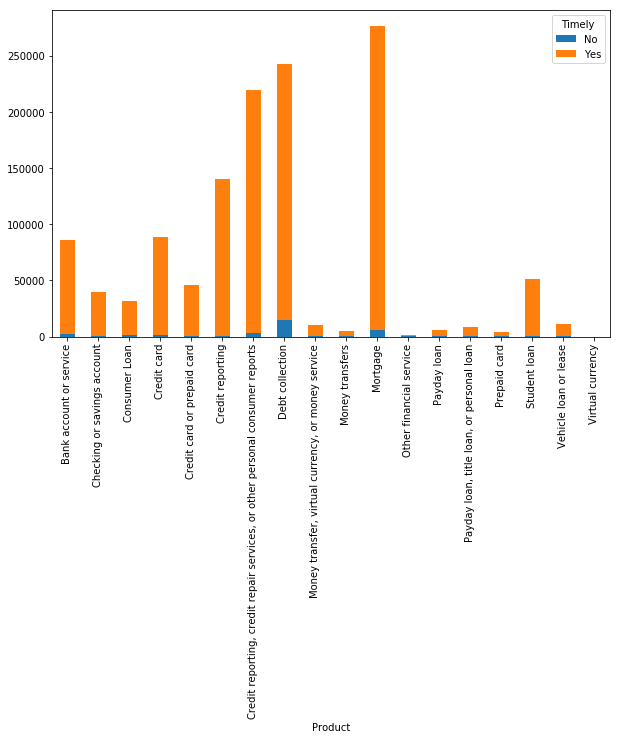

In [32]:
pd.crosstab(dataframe['Product'], dataframe['Timely']).plot(kind='bar', stacked=True, figsize=(10,6))

In [34]:
df = pd.DataFrame(pd.crosstab(dataframe['Company'], dataframe['Timely']))

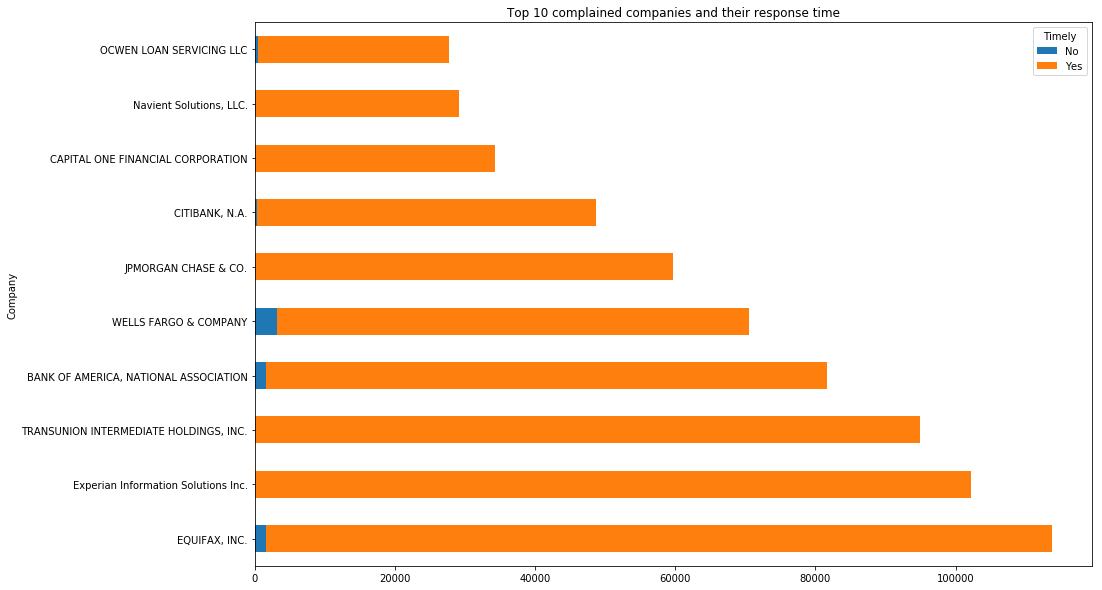

In [46]:
df['Total']= df['Yes'].astype(int) + df['No'].astype(int)
df = df.sort_values(by='Total',ascending=False)
df[0:10].drop(['Total'],axis=1).plot(kind='barh', figsize=(15,10), stacked=True, title="Top 10 complained companies and their response time")

In [47]:
dataframe.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,consumer_consent,Submitted via,Date_sent,company_response,Timely,consumer_disputed,Complaint ID,year
0,2019-04-24,Vehicle loan or lease,Lease,Problems at the end of the loan or lease,"Excess mileage, damage, or wear fees, or other...",NaN,NaN,ALLY FINANCIAL INC.,NY,11236,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3221592,2019
1,2019-04-24,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,32208,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3220825,2019
2,2019-04-24,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,NAVY FEDERAL CREDIT UNION,NaN,NaN,NaN,NaN,Referral,04/24/2019,In progress,Yes,NaN,3221769,2019
3,2019-04-24,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,NAVY FEDERAL CREDIT UNION,PA,NaN,NaN,NaN,Web,04/24/2019,In progress,Yes,NaN,3221849,2019
4,2019-04-24,Student loan,Private student loan,Dealing with your lender or servicer,Don't agree with the fees charged,NaN,Company believes it acted appropriately as aut...,LCS FINANCIAL SERVICES CORPORATION,NY,NaN,NaN,NaN,Web,04/24/2019,Closed with explanation,Yes,NaN,3220811,2019


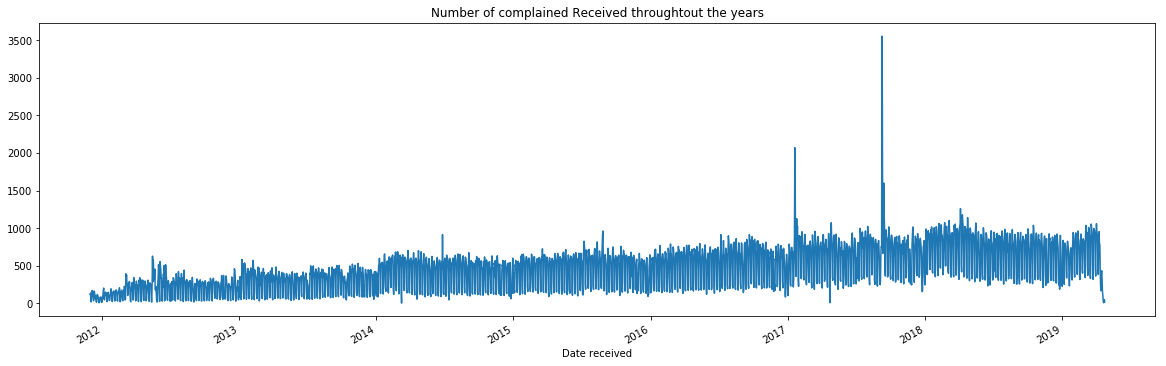

In [63]:
dataframe.groupby('Date received')['Date received'].count().plot(kind='line', figsize=(20,6), title="Number of complained Received throughtout the years")

In [71]:
dataframe['Date received'] = dataframe['Date received'].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

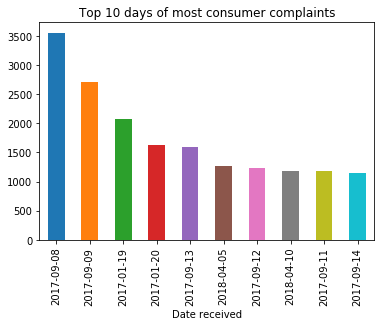

In [72]:
dataframe.groupby('Date received')['Date received'].count().sort_values(ascending=False)[:10].plot(kind='bar', title="Top 10 days of most consumer complaints")